<a href="https://colab.research.google.com/github/tasosnikitakis/Data_Science_Notebooks/blob/main/FBREF_data_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_html('https://fbref.com/en/comps/11/2022-2023/2022-2023-Serie-A-Stats')

In [45]:
squad_advanced_goalkeeping_stats

0     41.3
1     48.3
2     68.1
3     48.6
4     39.2
5     50.3
6     34.8
7     37.1
8     31.4
9     43.2
10    37.2
11    50.3
12    28.0
13    30.5
14    67.1
15    58.2
16    44.6
17    52.1
18    35.8
19    48.7
Name: PSxG, dtype: float64

In [44]:
squad_standard_stats = df[2]
squad_standard_stats.columns = squad_standard_stats.columns.droplevel()
squad_standard_stats = squad_standard_stats.iloc[:, 0:22]
squad_standard_stats = squad_standard_stats.drop(['# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'G+A', 'G-PK', 'npxG', 'xAG',
       'npxG+xAG'], axis=1)
squad_goalkeeping_stats = df[4]
squad_goalkeeping_stats.columns = squad_goalkeeping_stats.columns.droplevel()
squad_goalkeeping_stats = squad_goalkeeping_stats.drop(['Squad', '# Pl', 'MP', 'Starts', 'Min', '90s', 'GA90', 'Save%', 'W', 'D', 'L', 'CS%', 'PKatt', 'PKA', 'PKsv', 'PKm', 'Save%'], axis=1)
squad_advanced_goalkeeping_stats = df[6]
squad_advanced_goalkeeping_stats.columns = squad_advanced_goalkeeping_stats.columns.droplevel()
squad_advanced_goalkeeping_stats = squad_advanced_goalkeeping_stats['PSxG']
squad_shooting_stats = df[8]
squad_shooting_stats.columns = squad_shooting_stats.columns.droplevel()
squad_passing_stats = df[10]
squad_passing_stats.columns = squad_passing_stats.columns.droplevel()
squad_pass_type_stats = df[12]
squad_pass_type_stats.columns = squad_pass_type_stats.columns.droplevel()
squad_goal_and_shot_creation_stats = df[14]
squad_goal_and_shot_creation_stats.columns = squad_goal_and_shot_creation_stats.columns.droplevel()
squad_defensive_action_stats = df[16]
squad_defensive_action_stats.columns = squad_defensive_action_stats.columns.droplevel()
squad_possesion_stats = df[18]
squad_possesion_stats.columns = squad_possesion_stats.columns.droplevel()
squad_misc_stats = df[20]
squad_misc_stats.columns = squad_misc_stats.columns.droplevel()

In [4]:
squad_standard_stats

,Squad,Age,Poss,MP,Starts,Min,90s,Gls,Ast,G+A,...,Gls,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG
0,Atalanta,26.5,49.9,38,418,3420,38.0,64,42,106,...,1.68,1.11,2.79,1.53,2.63,1.52,1.12,2.64,1.35,2.47
1,Bologna,26.6,54.7,38,418,3420,38.0,52,41,93,...,1.37,1.08,2.45,1.21,2.29,1.15,0.83,1.98,1.04,1.87
2,Cremonese,26.0,42.1,38,418,3420,38.0,35,18,53,...,0.92,0.47,1.39,0.79,1.26,1.02,0.64,1.66,0.87,1.51
3,Empoli,25.3,47.3,38,418,3420,38.0,35,20,55,...,0.92,0.53,1.45,0.87,1.39,1.02,0.71,1.73,0.98,1.69
4,Fiorentina,26.5,56.1,38,418,3420,38.0,51,37,88,...,1.34,0.97,2.32,1.24,2.21,1.45,1.06,2.51,1.34,2.39
5,Hellas Verona,26.6,41.2,38,418,3420,38.0,29,22,51,...,0.76,0.58,1.34,0.74,1.32,0.94,0.74,1.68,0.92,1.66
6,Inter,28.8,55.7,38,418,3420,38.0,68,50,118,...,1.79,1.32,3.11,1.68,3.00,1.79,1.36,3.15,1.70,3.06
7,Juventus,27.7,49.6,38,418,3420,38.0,56,41,97,...,1.47,1.08,2.55,1.39,2.47,1.45,1.05,2.50,1.33,2.37
8,Lazio,28.6,52.1,38,418,3420,38.0,59,37,96,...,1.55,0.97,2.53,1.39,2.37,1.35,0.90,2.25,1.18,2.08
9,Lecce,24.8,41.3,38,418,3420,38.0,31,21,52,...,0.82,0.55,1.37,0.71,1.26,0.95,0.66,1.61,0.83,1.49


In [ ]:
shooting = pd.read_html('https://fbref.com/en/comps/12/shooting/La-Liga-Stats')

In [ ]:
for idx,table in enumerate(shooting):
    print("********************")
    print(idx)
    print(table)

********************
0
   Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Standard          \
                Squad               # Pl                90s      Gls  Sh SoT   
0              Alavés                 16                1.0        0  10   2   
1             Almería                 20                2.0        1  39  13   
2       Athletic Club                 18                2.0        2  15   3   
3     Atlético Madrid                 19                2.0        3  19   7   
4           Barcelona                 18                2.0        2  37  13   
5               Betis                 17                2.0        2  26   5   
6               Cádiz                 19                2.0        1  22   4   
7          Celta Vigo                 18                2.0        1  28   6   
8              Getafe                 16                2.0        0  14   4   
9              Girona                 17                2.0        4  13   7   
10            Gra

In [ ]:
shooting = pd.DataFrame(shooting[0])

In [ ]:
shooting.columns = shooting.columns.droplevel()

In [ ]:
shooting.columns

Index(['Squad', '# Pl', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90',
       'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh',
       'G-xG', 'np:G-xG'],
      dtype='object')

In [ ]:
shooting

,Squad,# Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Alavés,16,1.0,0,10,2,20.0,10.0,2.0,0.00,0.00,22.1,0,0,0,0.3,0.3,0.03,-0.3,-0.3
1,Almería,20,2.0,1,39,13,33.3,19.5,6.5,0.03,0.08,18.5,0,0,0,2.7,2.7,0.07,-1.7,-1.7
2,Athletic Club,18,2.0,2,15,3,20.0,7.5,1.5,0.13,0.67,15.7,1,0,0,2.0,2.0,0.13,0.0,0.0
3,Atlético Madrid,19,2.0,3,19,7,36.8,9.5,3.5,0.16,0.43,14.3,0,0,0,2.8,2.8,0.15,0.2,0.2
4,Barcelona,18,2.0,2,37,13,35.1,18.5,6.5,0.05,0.15,17.2,3,0,0,4.6,4.6,0.13,-2.6,-2.6
5,Betis,17,2.0,2,26,5,19.2,13.0,2.5,0.08,0.40,17.8,1,0,0,1.8,1.8,0.07,0.2,0.2
6,Cádiz,19,2.0,1,22,4,18.2,11.0,2.0,0.05,0.25,15.1,1,0,0,1.8,1.8,0.08,-0.8,-0.8
7,Celta Vigo,18,2.0,1,28,6,21.4,14.0,3.0,0.04,0.17,17.1,1,0,0,2.0,2.0,0.08,-1.0,-1.0
8,Getafe,16,2.0,0,14,4,28.6,7.0,2.0,0.00,0.00,17.1,1,0,0,1.3,1.3,0.09,-1.3,-1.3
9,Girona,17,2.0,4,13,7,53.8,6.5,3.5,0.31,0.57,14.3,1,0,0,2.2,2.2,0.17,1.8,1.8


In [ ]:
top4 = ['Real Madrid','Sevilla','Barcelona','Atlético Madrid']

In [ ]:
subset_shooting = shooting[shooting['Squad'].isin(top4)]

''

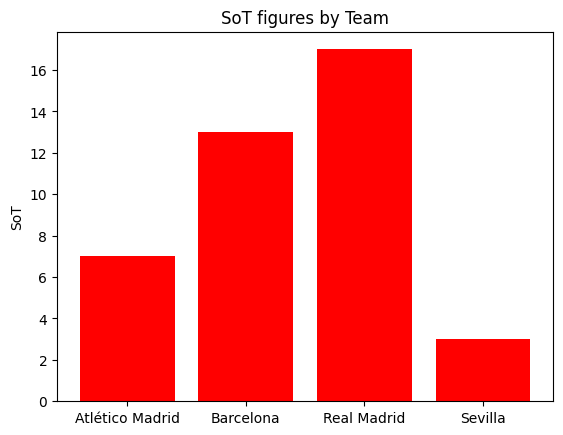

In [ ]:
plt.bar(subset_shooting['Squad'],subset_shooting['SoT'], color = 'red')
plt.title('SoT figures by Team')
plt.ylabel('SoT')
;

Specify URLS



In [ ]:
urls = ['https://fbref.com/en/comps/9/2021-2022/schedule/2021-2022-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2020-2021/schedule/2020-2021-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2019-2020/schedule/2019-2020-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2018-2019/schedule/2018-2019-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2017-2018/schedule/2017-2018-Premier-League-Scores-and-Fixtures']

Loop through the URL list and append them to a pandas dataframe.



In [ ]:
epl_df_list = []

for url in urls:
    epl_df_list.append(pd.read_html(url,index_col=False)[0])
    epl_df = pd.concat(epl_df_list, axis=0, ignore_index=True)

Remove the NAN values



In [ ]:
epl_df = epl_df[epl_df['Wk'].notna()]

Rename the XG columns

In [ ]:
epl_df = epl_df.rename(columns={'xG':'xGHome'
                   ,'xG.1':'xGAway'})

Add the scores columns by slicing.



In [ ]:
epl_df['HomeScore'] = epl_df['Score'].str[0]
epl_df['AwayScore'] = epl_df['Score'].str[2]

Drop the irrelevant fields



In [ ]:
epl_df = epl_df.drop(['Match Report','Notes'],axis=1)


Order by date

In [ ]:
#convert to date

epl_df['Date'] = pd.to_datetime(epl_df['Date'])

In [ ]:
epl_df.sort_values(by='Date', inplace=True)

In [ ]:
epl_df = epl_df[['Wk','Day','Date','Time','Home','HomeScore','xGHome','AwayScore','xGAway','Away','Attendance','Venue','Referee']]

In [ ]:
epl_df

,Wk,Day,Date,Time,Home,HomeScore,xGHome,AwayScore,xGAway,Away,Attendance,Venue,Referee
1732,1.0,Fri,2017-08-11,19:45,Arsenal,4,2.5,3,1.5,Leicester City,59387.0,Emirates Stadium,Mike Dean
1739,1.0,Sat,2017-08-12,17:30,Brighton,0,0.3,2,1.9,Manchester City,30415.0,The American Express Community Stadium,Michael Oliver
1733,1.0,Sat,2017-08-12,12:30,Watford,3,2.1,3,2.6,Liverpool,20407.0,Vicarage Road Stadium,Anthony Taylor
1734,1.0,Sat,2017-08-12,15:00,Crystal Palace,0,1.1,3,1.5,Huddersfield,25448.0,Selhurst Park,Jonathan Moss
1735,1.0,Sat,2017-08-12,15:00,West Brom,1,1.3,0,0.5,Bournemouth,25011.0,The Hawthorns,Robert Madley
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,38.0,Sun,2022-05-22,16:00,Leicester City,4,3.4,1,1.1,Southampton,32003.0,King Power Stadium,Jonathan Moss
438,38.0,Sun,2022-05-22,16:00,Brentford,1,0.8,2,1.3,Leeds United,16957.0,Brentford Community Stadium,Paul Tierney
446,38.0,Sun,2022-05-22,16:00,Burnley,1,1.6,2,1.8,Newcastle Utd,21361.0,Turf Moor,Craig Pawson
440,38.0,Sun,2022-05-22,16:00,Crystal Palace,1,0.6,0,0.7,Manchester Utd,25434.0,Selhurst Park,Martin Atkinson
